## Testes e IC 2 - Respondendo a pergunta 2 (atributos padrão)

Primeiramente, iremos fazer alguns imports, configurações e carregar nossos dados.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
plt.rcParams['axes.labelsize']  = 18
plt.rcParams['axes.titlesize']  = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['lines.linewidth'] = 3
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

In [3]:
df = pd.read_csv('../dataset/songs_one_hot_encoding.csv',
                 encoding='iso-8859-1', na_values='unknown')

Filtraremos os dados em dois grandes grupos: músicas que já atingiram o top 10 (peak_pos <= 10), e músicas que nunca atingiram o top 10 (peak_pos > 10).

In [4]:
top_10_songs = df[df['peak_pos'] <= 10]
top_10_songs.describe()

,peak_pos,pop,dance pop,pop rap,rap,post-teen pop,hip hop,r&b,contemporary country,southern hip hop,...,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
count,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,...,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000
mean,4.689688,0.596026,0.591296,0.402081,0.278146,0.315989,0.218543,0.315043,0.018921,0.175024,...,0.113852,0.137331,0.010689,3.994324,0.668859,5.103122,237962.465468,-5.775912,0.560820,0.603595
std,2.998771,0.490925,0.491827,0.490550,0.448298,0.465128,0.413453,0.464753,0.136312,0.380167,...,0.107339,0.180935,0.079633,0.226062,0.140930,3.602629,43520.973098,2.135248,0.221864,0.489382
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.024100,0.000046,0.000000,0.000000,0.160000,0.000000,124056.000000,-18.228000,0.038800,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.040300,0.015900,0.000000,4.000000,0.583000,1.000000,212107.000000,-6.814000,0.389000,0.000000
50%,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.067700,0.058700,0.000000,4.000000,0.680000,5.000000,231653.000000,-5.519000,0.578000,1.000000
75%,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.147000,0.197000,0.000019,4.000000,0.763000,8.000000,257133.000000,-4.321000,0.743000,1.000000
max,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.681000,0.966000,0.926000,5.000000,0.973000,11.000000,688453.000000,-1.097000,0.975000,1.000000


In [5]:
non_top_10_songs = df[df['peak_pos'] > 10]
non_top_10_songs.describe()

,peak_pos,pop,dance pop,pop rap,rap,post-teen pop,hip hop,r&b,contemporary country,southern hip hop,...,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
count,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,...,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000
mean,55.512683,0.388880,0.327398,0.283051,0.240383,0.195196,0.176718,0.158576,0.200235,0.159079,...,0.102201,0.170560,0.013434,3.970771,0.616812,5.277843,230860.169998,-5.950940,0.510824,0.686881
std,25.969033,0.487537,0.469303,0.450519,0.427352,0.396385,0.381462,0.365310,0.400210,0.365781,...,0.104638,0.215192,0.089911,0.274631,0.147603,3.583313,44699.094237,2.362978,0.223682,0.463801
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.022500,0.000001,0.000000,1.000000,0.113000,0.000000,37067.000000,-22.015000,0.033200,0.000000
25%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.035200,0.017200,0.000000,4.000000,0.515000,2.000000,203573.000000,-7.080000,0.332000,0.000000
50%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.053100,0.077100,0.000000,4.000000,0.618000,6.000000,226200.000000,-5.571000,0.508000,1.000000
75%,78.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.125000,0.245000,0.000021,4.000000,0.720000,8.000000,252800.000000,-4.333000,0.682000,1.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.930000,0.995000,0.982000,5.000000,0.986000,11.000000,721580.000000,-0.320000,0.977000,1.000000


# Testes de Hipóteses

Nos testes de hipóteses, tentaremos descobrir a "cara" das músicas que atingem o top 10 da Billboard, no que diz respeito às features do Spotify. Ou seja: será que as músicas que chegam no top 10 da Billborad tem um danceability alto? Será que elas tem um mode baixo? Será que elas possuem uma valencia alta?

In [6]:
spotify_features = list(df.columns[22:])
spotify_features.remove('duration_ms')
spotify_features.remove('time_signature')
spotify_features

['energy',
 'liveness',
 'tempo',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'danceability',
 'key',
 'loudness',
 'valence',
 'mode']

Para isso, vamos basear os nossos testes de hipóteses em testes de permutação.

Inicialmente, iremos criar uma coluna auxiliar no nosso dataset, que indicará se a música já atingiu ou não o top 10. Faremos isso pra facilitar o filtro durante o teste de permutação.

In [7]:
df['reached_top_10'] = df['peak_pos'] <= 10

Abaixo, criamos algumas funções auxiliares, para facilitar o trabalho.

In [8]:
def shuffle(feature):
    return feature.sample(frac=1, replace=False).reset_index(drop=True)

def plot_groups_histogram(feature_name):
    sns.distplot(non_top_10_songs[feature_name], kde=True, color='r', hist_kws=dict(alpha=0.3))
    sns.distplot(top_10_songs[feature_name], kde=True, hist_kws=dict(alpha=0.3))
    plt.legend(['Non-top10', 'Top10'])
    plt.ylabel('Porcentagem de amostras')
    plt.xlabel('{}'.format(feature_name))
    plt.show()

def plot_permutation_vs_observed(perm_difference, observed_difference):
    figure(figsize=(14,7))
    plt.hist(perm_difference, bins=30, edgecolor='k', color='grey')
    plt.vlines(observed_difference, ymin=0, ymax=600, color='red')
    plt.legend(['Observed mean difference', 'Mean difference distribution from permutation test'])
    plt.ylabel('Numero de Amostras')
    plt.xlabel('Diferença das médias')
    plt.show()
    
def calculate_p_value(perm_difference, observed_difference, n_iter=5000):
    if observed_difference > 0:
        return np.count_nonzero(perm_difference > observed_difference) / n_iter
    else:
        return np.count_nonzero(perm_difference <= observed_difference) / n_iter

Agora criaremos uma função que fará o teste de permutação de uma feature recebida por parâmetro.

In [9]:
def mean_difference_permutation_test(feature_name, n = 5000):
    filtro = df['reached_top_10'] == True
    differences = np.array([])
    for _ in range(n):
        np.random.shuffle(filtro.values)
        diff = df[filtro][feature_name].mean() - df[~filtro][feature_name].mean()
        differences = np.append(differences, diff)
    return differences

Por fim, definiremos uma função que receberá o nome de uma feature, e fará todo o processo do teste de hipótese:
    1. Plotará o histograma de densidade da feature, com 30 bins, para os dois grupos (top10 vs nontop10);
    2. Calculará a diferença da média observada entre os dois grupos;
    3. Computará o teste de permutação da diferença;
    4. Plotará o histograma das diferenças, juntamente com a diferença observada;
    5. Calculará o p-valor.
   
Com isso, poderemos facilmente fazer vários testes de hipóteses, tentando entender quais features podem influenciar uma música a chegar no top10. Iremos considerar o limiar de p-valor como **0.05**, para efeitos de rejeição da hipótese nula.

In [10]:
def permutation_test_for_feature(feature_name):
    plot_groups_histogram(feature_name)
    observed_diff = top_10_songs[feature_name].mean() - non_top_10_songs[feature_name].mean()
    print("Diferença observada entre as médias de {}: {}".format(feature_name, observed_diff))
    perm_diff = mean_difference_permutation_test(feature_name, n = 5000)
    plot_permutation_vs_observed(perm_diff, observed_diff)
    p_val = calculate_p_value(perm_diff, observed_diff, 5000)
    print("P-valor do teste: {}".format(p_val))
    return (feature_name, observed_diff, p_val, p_val < 0.05)

Com essas ferramentas, podemos partir para os testes de hipóteses!

Iremos armazenar os dados de cada execução num vetor, para construir uma tabela resumindo os resultados obtidos.

In [11]:
results = []

## Teste de Hipótese - Energy
### H0: na população, a distribuição do atributo "energy" é igual para músicas que já atingiram o top 10 e músicas que nunca atingiram o top 10. A diferença nas amostras pode ser explicada pelo acaso.

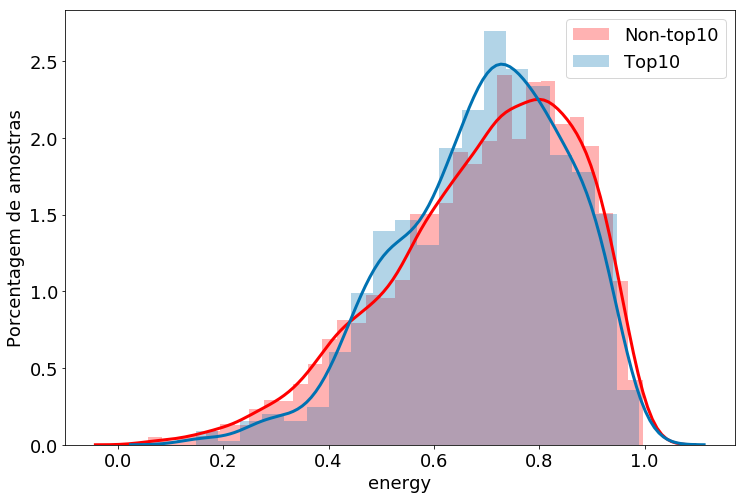

Diferença observada entre as médias de energy: 4.7947474390519496e-05


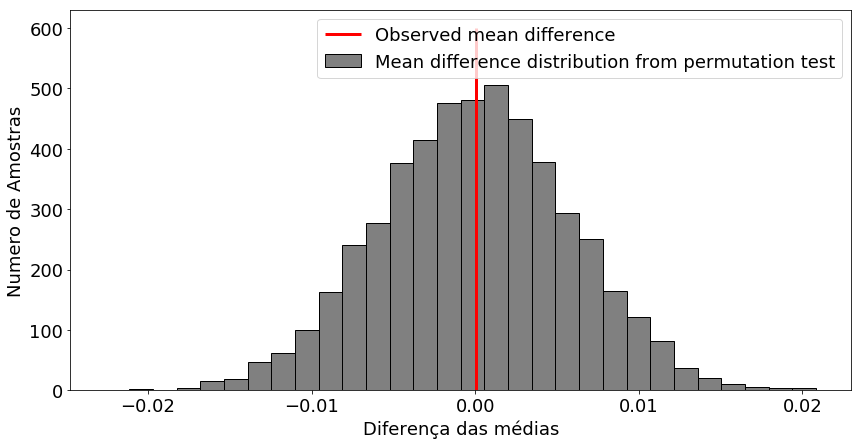

P-valor do teste: 0.501


In [12]:
permutation_test_energy = permutation_test_for_feature('energy')
results.append(permutation_test_energy)

Como podemos observar no plot, o valor observado ficou ao centro da distribuição da permutação. O p-valor confirma que não podemos rejeitar H0.

## Teste de Hipótese - Danceability

### H0: na população, a distribuição do atributo "danceability" é igual para músicas que já atingiram o top 10 e músicas que nunca atingiram o top 10. A diferença nas amostras pode ser explicada pelo acaso.

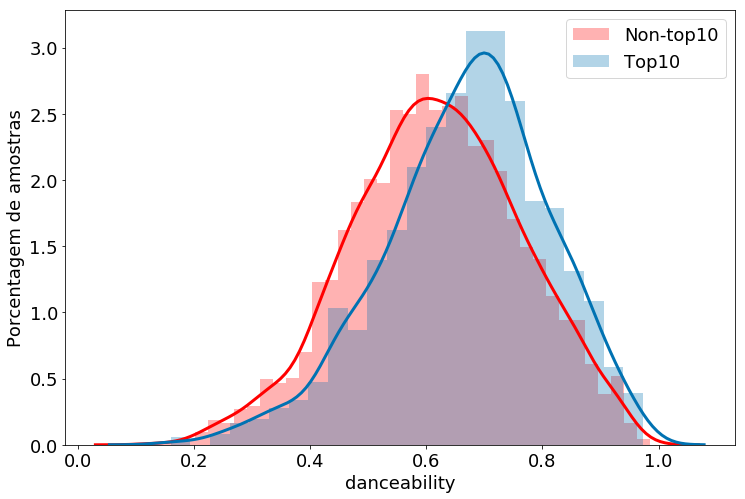

Diferença observada entre as médias de danceability: 0.05204700745559354


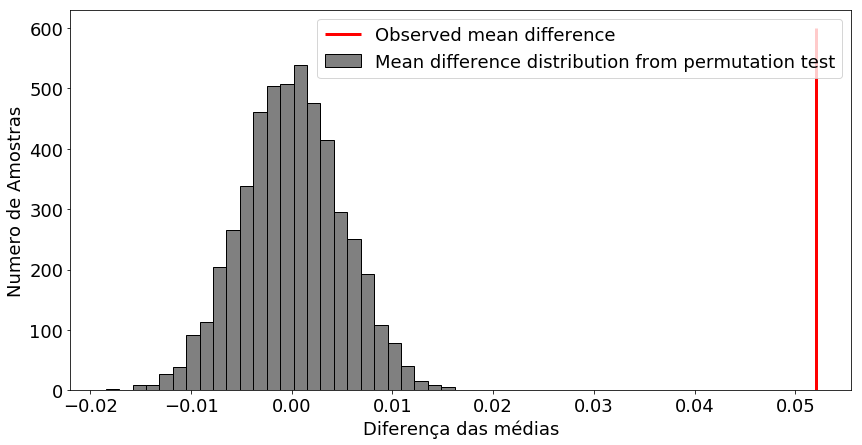

P-valor do teste: 0.0


In [13]:
results.append(permutation_test_for_feature('danceability'))

Parece que a diferença observada não pode ser explicada pelo acaso! P-valor 0. Portanto rejeitamos H0.

Ou seja, a distribuição de "danceability" não é uniforme para músicas que já atingiram o top 10 e músicas que não atingiram.

## Teste de Hipótese - Liveness

### H0: na população, a distribuição do atributo "liveness" é igual para músicas que já atingiram o top 10 e músicas que nunca atingiram o top 10. A diferença nas amostras pode ser explicada pelo acaso.

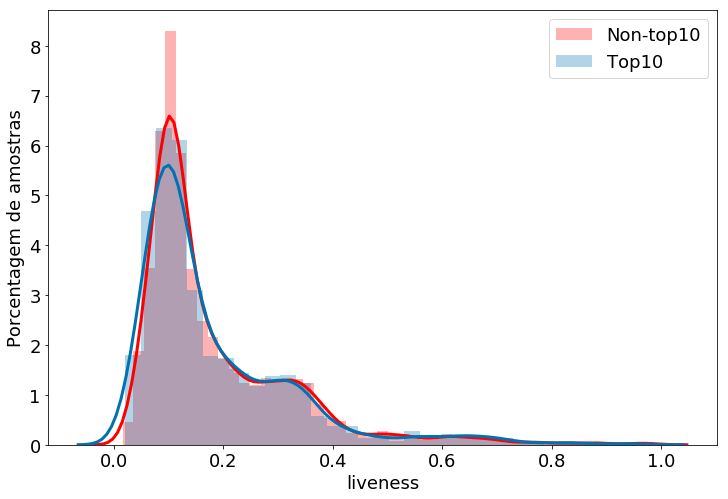

Diferença observada entre as médias de liveness: -0.0054043906533058905


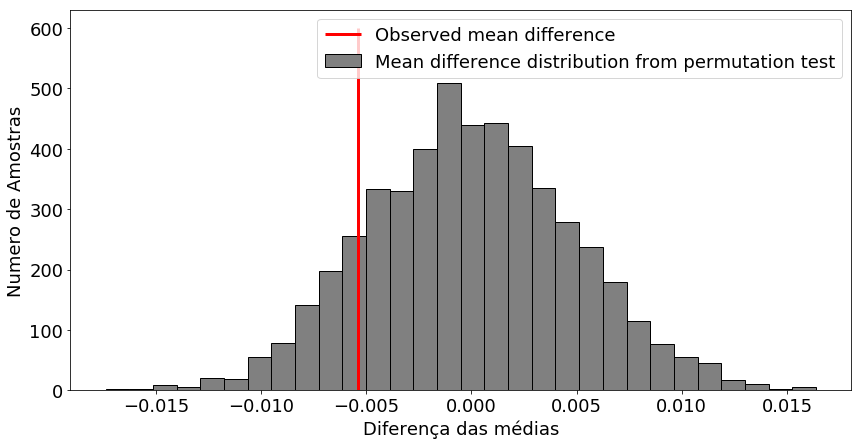

P-valor do teste: 0.1354


In [14]:
results.append(permutation_test_for_feature('liveness'))

Nesse caso, não podemos rejeitar H0, visto que o p-valor é maior que o limiar de 0.05.

## Teste de Hipótese - Tempo

### H0: na população, a distribuição do atributo "tempo" é igual para músicas que já atingiram o top 10 e músicas que nunca atingiram o top 10. A diferença nas amostras pode ser explicada pelo acaso.

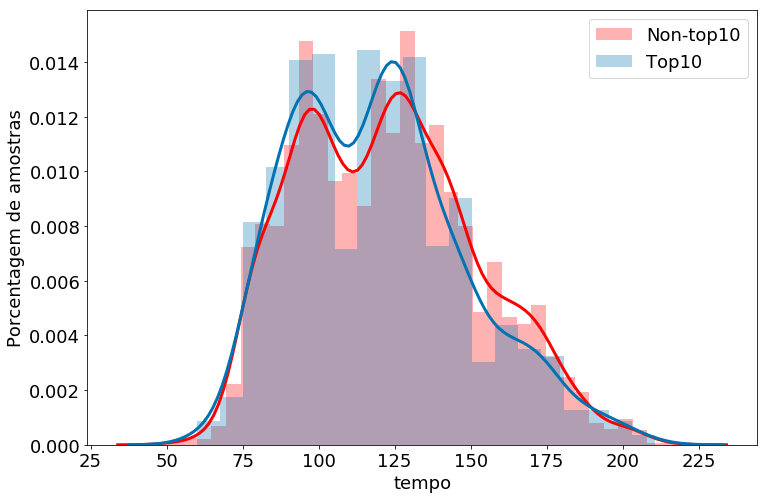

Diferença observada entre as médias de tempo: -2.905214779252347


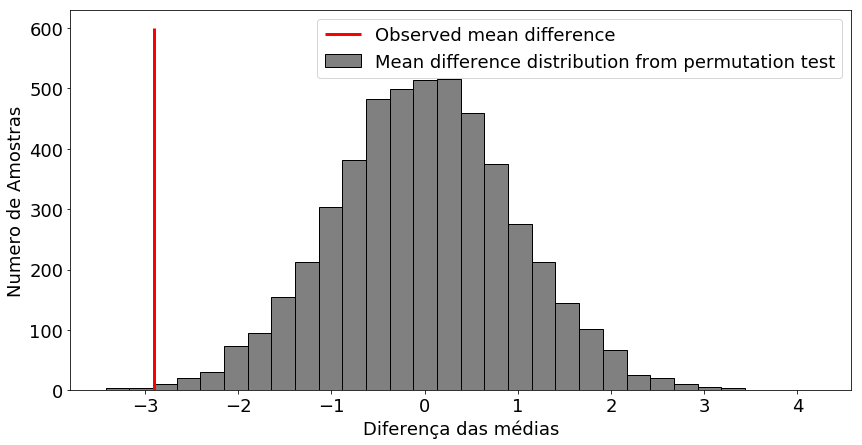

P-valor do teste: 0.0016


In [15]:
results.append(permutation_test_for_feature('tempo'))

Como o p-valor é inferior a 0.05, rejeitamos H0!

## Teste de Hipótese - Speechiness
### H0: na população, a distribuição do atributo "speechiness" é igual para músicas que já atingiram o top 10 e músicas que nunca atingiram o top 10. A diferença nas amostras pode ser explicada pelo acaso.

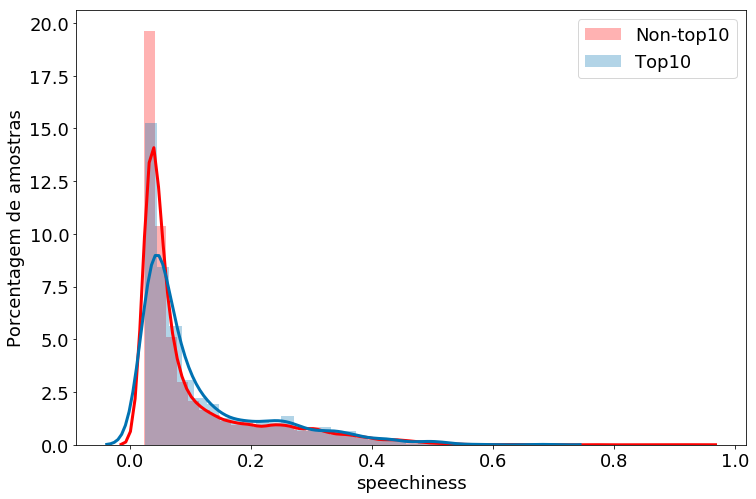

Diferença observada entre as médias de speechiness: 0.01165081222016491


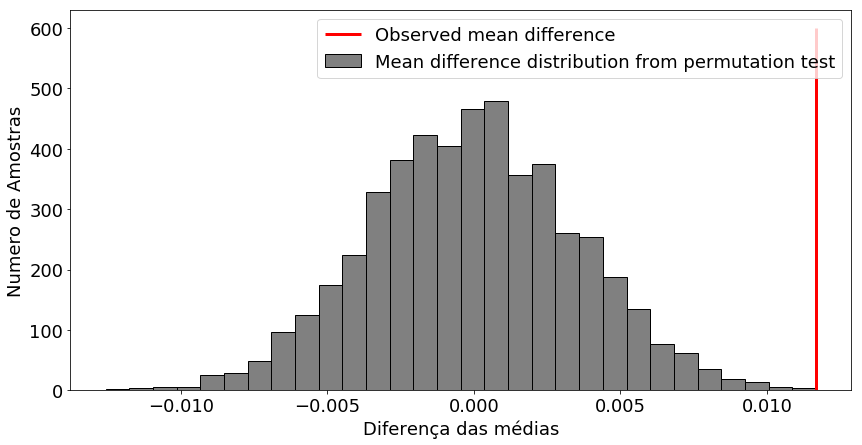

P-valor do teste: 0.0002


In [16]:
results.append(permutation_test_for_feature('speechiness'))

P valor inferior a 0.05, rejeitamos a hipótese nula.

## Teste de Hipótese - Acousticness
### H0: na população, a distribuição do atributo "acousticness" é igual para músicas que já atingiram o top 10 e músicas que nunca atingiram o top 10. A diferença nas amostras pode ser explicada pelo acaso.

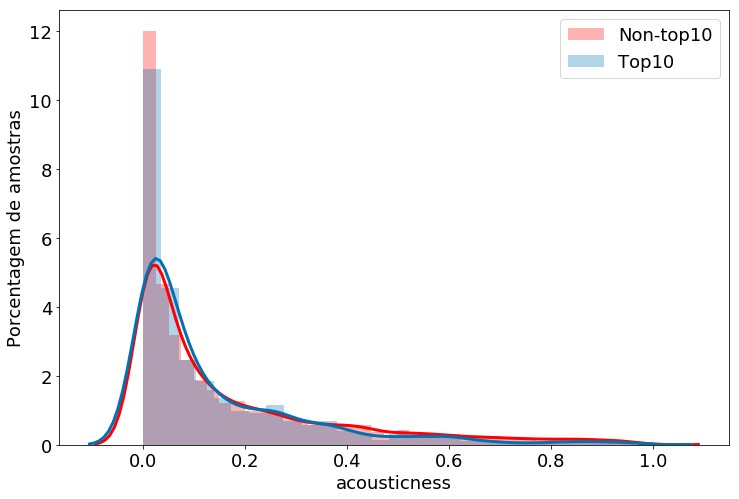

Diferença observada entre as médias de acousticness: -0.033229565586830934


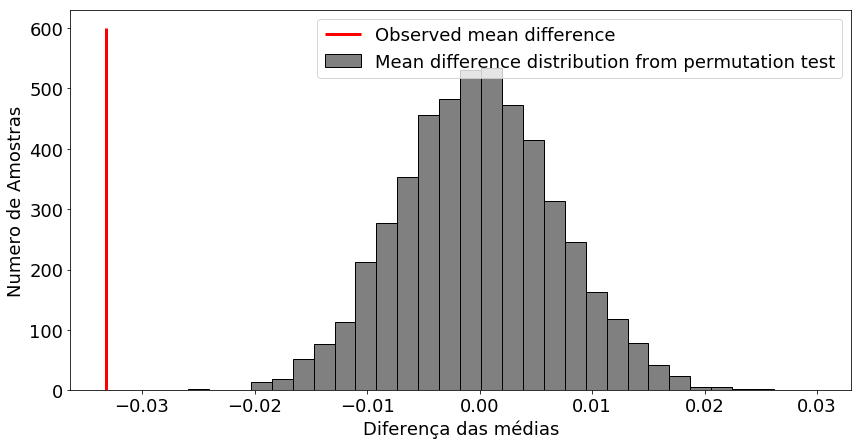

P-valor do teste: 0.0


In [17]:
results.append(permutation_test_for_feature('acousticness'))

P valor também é inferior ao limiar de 0.05! Rejeitamos H0.

## Teste de Hipótese - Instrumentalness
### H0: na população, a distribuição do atributo "instrumentalness" é igual para músicas que já atingiram o top 10 e músicas que nunca atingiram o top 10. A diferença nas amostras pode ser explicada pelo acaso.

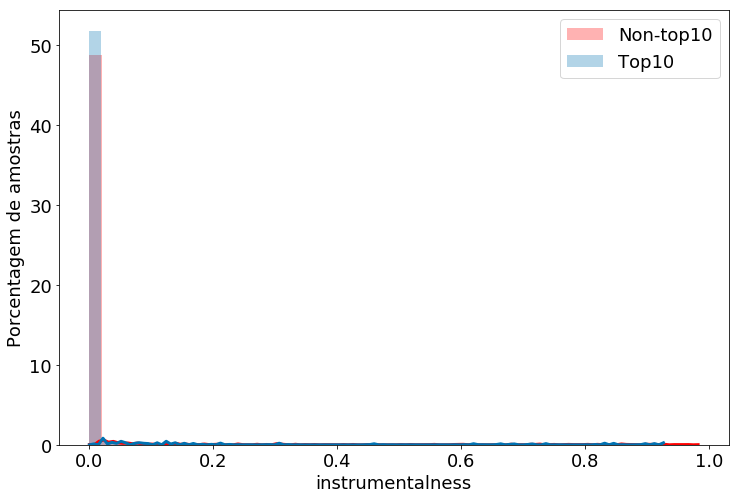

Diferença observada entre as médias de instrumentalness: -0.0027443378667299494


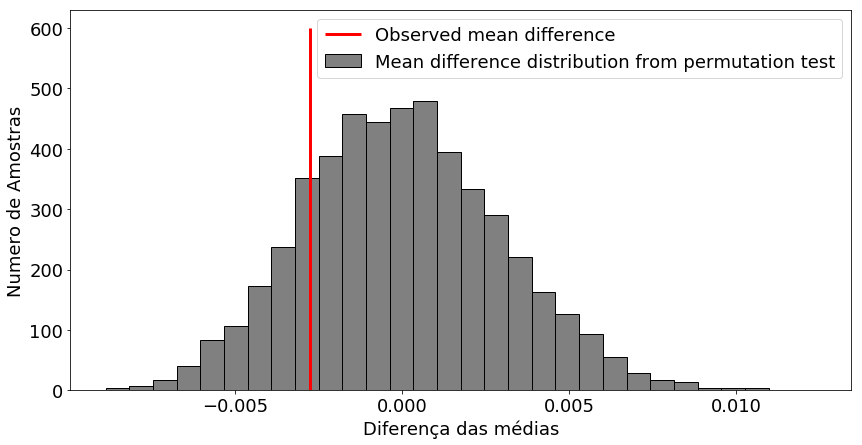

P-valor do teste: 0.1758


In [18]:
results.append(permutation_test_for_feature('instrumentalness'))

Agora temos outra feature que não conseguimos rejeitar H0.

## Teste de Hipótese - TimeSignature
### H0: na população, a distribuição do atributo "time_signature" é igual para músicas que já atingiram o top 10 e músicas que nunca atingiram o top 10. A diferença nas amostras pode ser explicada pelo acaso.

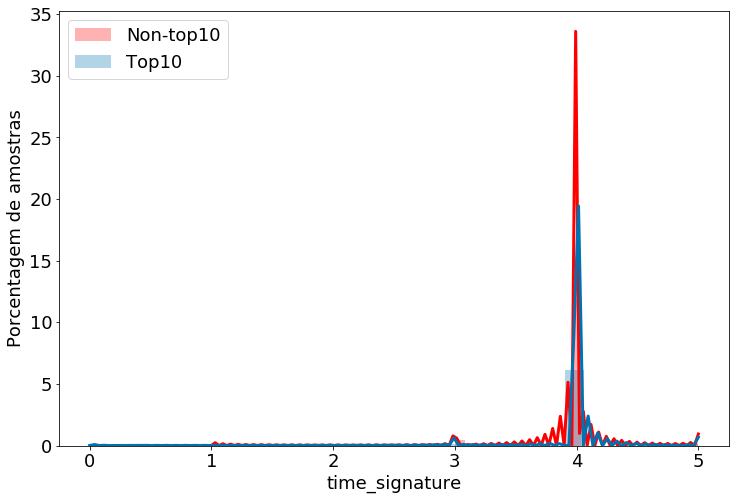

Diferença observada entre as médias de time_signature: 0.023552517425605046


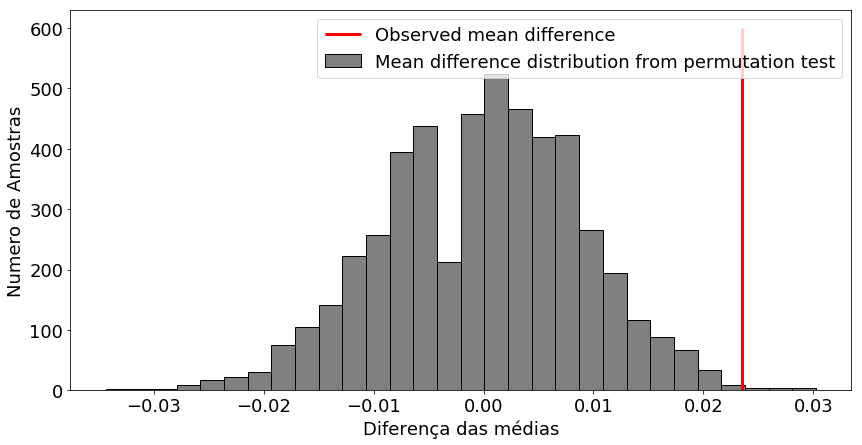

P-valor do teste: 0.002


In [19]:
results.append(permutation_test_for_feature('time_signature'))

## Teste de Hipótese - Key
### H0: na população, a distribuição do atributo "key" é igual para músicas que já atingiram o top 10 e músicas que nunca atingiram o top 10. A diferença nas amostras pode ser explicada pelo acaso.

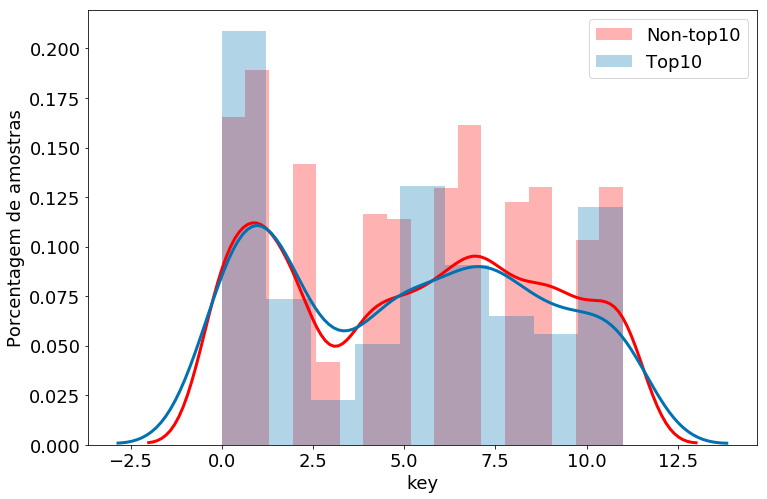

Diferença observada entre as médias de key: -0.17472106079775696


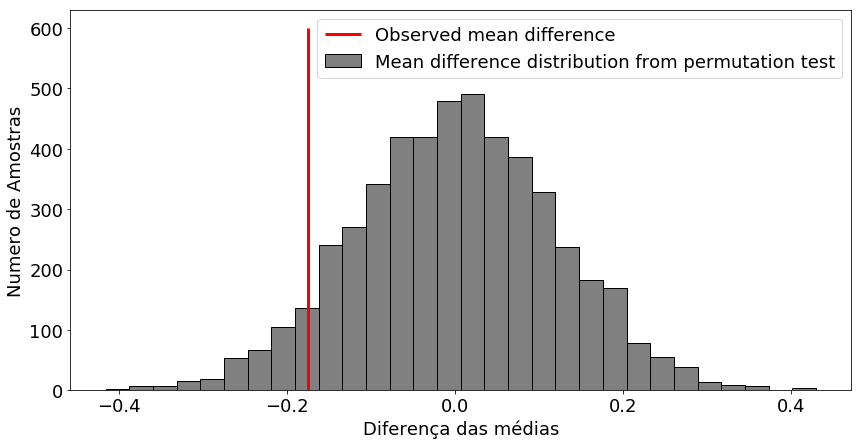

P-valor do teste: 0.0692


In [20]:
results.append(permutation_test_for_feature('key'))

## Teste de Hipótese - Loudness
### H0: na população, a distribuição do atributo "loudness" é igual para músicas que já atingiram o top 10 e músicas que nunca atingiram o top 10. A diferença nas amostras pode ser explicada pelo acaso.

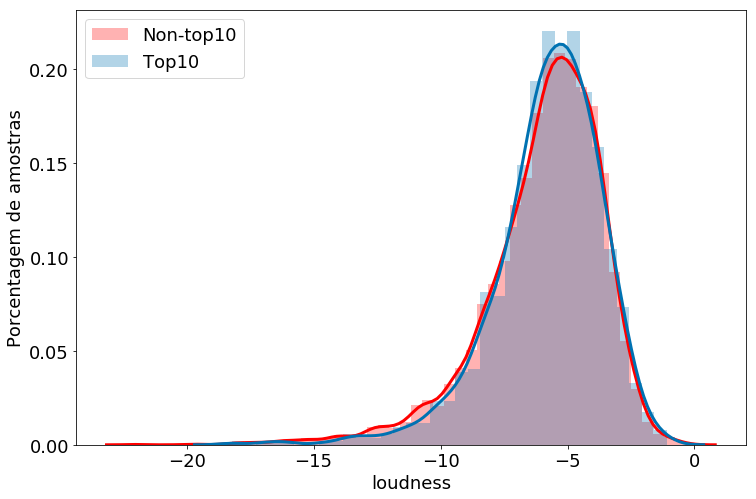

Diferença observada entre as médias de loudness: 0.17502767913462236


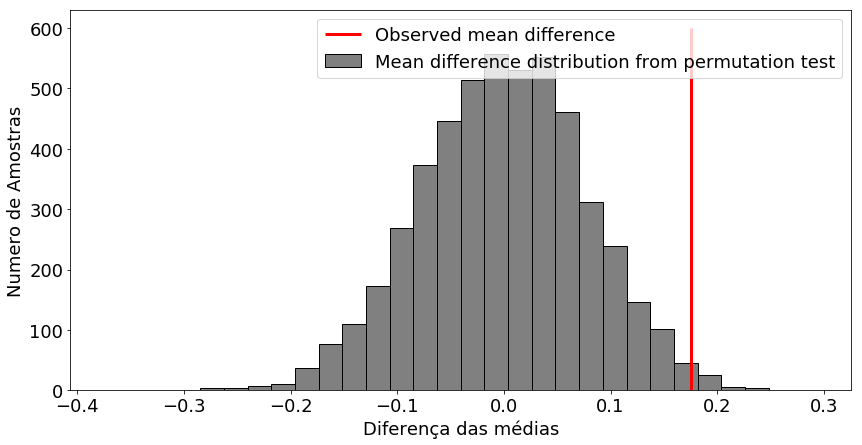

P-valor do teste: 0.01


In [21]:
results.append(permutation_test_for_feature('loudness'))

## Teste de Hipótese - Valence
### H0: na população, a distribuição do atributo "valence" é igual para músicas que já atingiram o top 10 e músicas que nunca atingiram o top 10. A diferença nas amostras pode ser explicada pelo acaso.

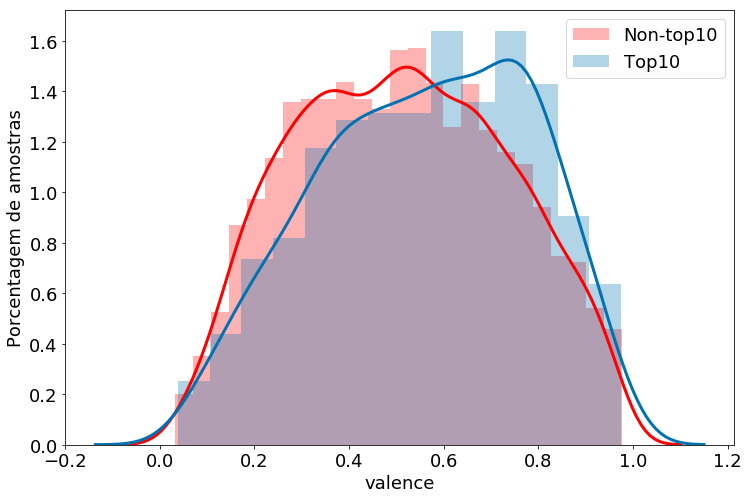

Diferença observada entre as médias de valence: 0.04999590087664185


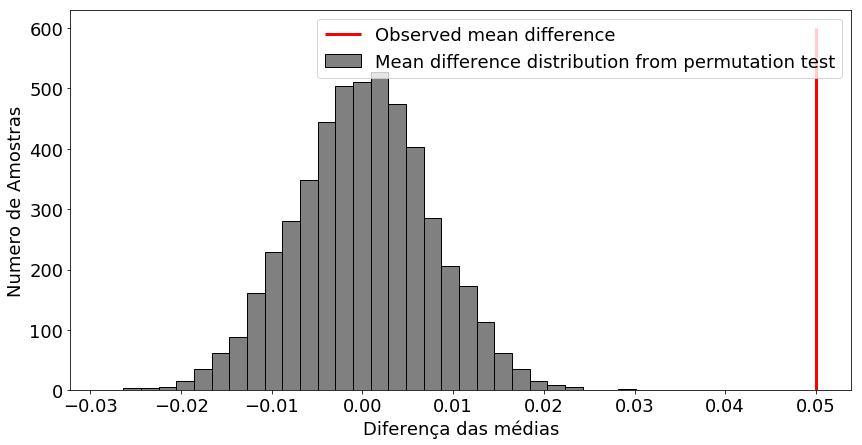

P-valor do teste: 0.0


In [22]:
results.append(permutation_test_for_feature('valence'))

## Teste de Hipótese - Mode
### H0: na população, a distribuição do atributo "mode" é igual para músicas que já atingiram o top 10 e músicas que nunca atingiram o top 10. A diferença nas amostras pode ser explicada pelo acaso.

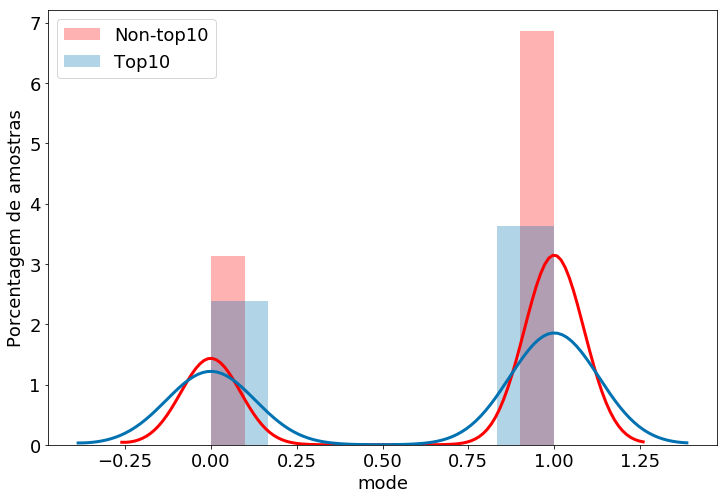

Diferença observada entre as médias de mode: -0.08328548400502767


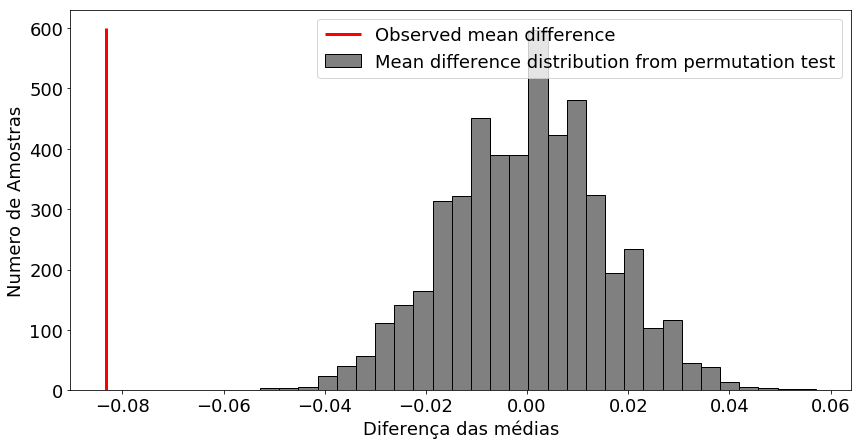

P-valor do teste: 0.0


In [23]:
results.append(permutation_test_for_feature('mode'))

Temos uma feature discreta, que só assume valores 0 ou 1.

Para **mode**, o p-valor também é inferior a 0.05, portanto também conseguimos rejeitar H0.

Depois de avaliar tudo isso, podemos construir uma tabela, sumarizando o resultado dos nossos testes de hipóteses.

In [24]:
results

[('energy', 4.7947474390519496e-05, 0.501, False),
 ('danceability', 0.05204700745559354, 0.0, True),
 ('liveness', -0.0054043906533058905, 0.1354, False),
 ('tempo', -2.905214779252347, 0.0016, True),
 ('speechiness', 0.01165081222016491, 0.0002, True),
 ('acousticness', -0.033229565586830934, 0.0, True),
 ('instrumentalness', -0.0027443378667299494, 0.1758, False),
 ('time_signature', 0.023552517425605046, 0.002, True),
 ('key', -0.17472106079775696, 0.0692, False),
 ('loudness', 0.17502767913462236, 0.01, True),
 ('valence', 0.04999590087664185, 0.0, True),
 ('mode', -0.08328548400502767, 0.0, True)]

In [25]:
result_table = pd.DataFrame(results, columns=["Feature", "Observed Mean Difference", "P-Value", "Rejected H0"])
result_table

,Feature,Observed Mean Difference,P-Value,Rejected H0
0,energy,0.000048,0.5010,False
1,danceability,0.052047,0.0000,True
2,liveness,-0.005404,0.1354,False
3,tempo,-2.905215,0.0016,True
4,speechiness,0.011651,0.0002,True
5,acousticness,-0.033230,0.0000,True
6,instrumentalness,-0.002744,0.1758,False
7,time_signature,0.023553,0.0020,True
8,key,-0.174721,0.0692,False
9,loudness,0.175028,0.0100,True


Como podemos observar, para a maioria dos atributos conseguimos rejeitar a H0 comum.
Com isso, conseguimos responder a pergunta 2:

_**Existem características "padrão" nas músicas que atingem o topo do top100?**_

Resposta: SIM. As características "padrão" dessas músicas são as features nas quais conseguimos rejeitar H0, e o "padrão" é a diferença observada entre o grupo do top10 e o grupo que não atinge o top10.

Podemos filtrar os atributos usando um one-liner:

In [26]:
result_table[result_table["Rejected H0"]]

,Feature,Observed Mean Difference,P-Value,Rejected H0
1,danceability,0.052047,0.0000,True
3,tempo,-2.905215,0.0016,True
4,speechiness,0.011651,0.0002,True
5,acousticness,-0.033230,0.0000,True
7,time_signature,0.023553,0.0020,True
9,loudness,0.175028,0.0100,True
10,valence,0.049996,0.0000,True
11,mode,-0.083285,0.0000,True


Com isso, poderíamos ter um ponto de partida para utilização de ML.